In [52]:
# Lasso regression
from sklearn.linear_model import Lasso
import pandas as pd
data = pd.read_csv('Student_Performance.csv')
#print(data)
#print(data[:8000])
y = data['Performance_Index']
X = data.drop(['Performance_Index'],axis=1)
X_train = X[:8000]
y_train = y[:8000]
X_test = X[8000:]
y_test = y[8000:]
features = list(X.columns)

In [5]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.988266754230571

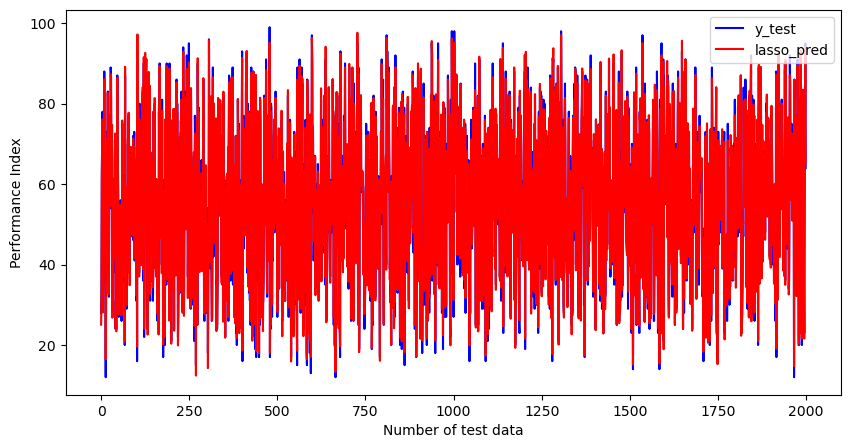

In [6]:
# Draw the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, color='b', label='y_test')
plt.plot(range(len(lasso_pred)), lasso_pred, color='r', label='lasso_pred')
plt.legend(loc='upper right')
plt.xlabel('Number of test data')
plt.ylabel('Performance Index')
plt.show()

In [9]:
# lasso系数路径图
import numpy as np
alphas = np.logspace(-4, -0.5, 30)
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
lasso_cv.coef_

array([2.85146839, 1.01802298, 0.63090554, 0.47414256, 0.19138652])

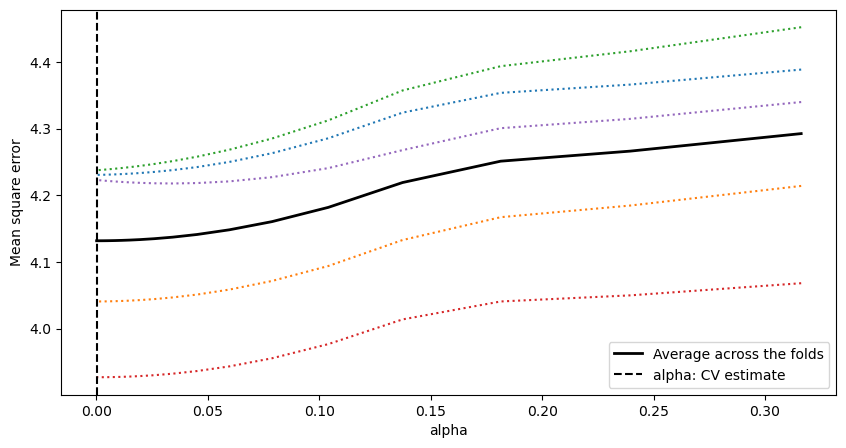

In [12]:
# lasso系数交叉验证曲线，横坐标为alpha，纵坐标为均方误差
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_, ':')
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(lasso_cv.alpha_, linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.axis('tight')
plt.show()

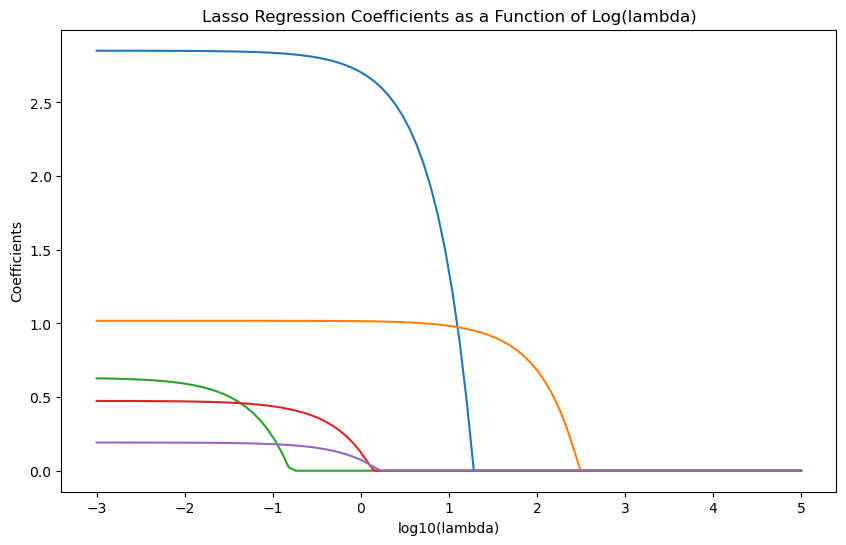

In [32]:
# 绘制Lambda与回归系数的关系，遍历所有的Lambda值
coefs = []
lasso_alphas = 10**np.linspace(-3, 5, 100)
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_.ravel())

plt.figure(figsize=(10, 6))
plt.plot(np.log10(lasso_alphas), coefs)
plt.xlabel('log10(lambda)')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients as a Function of Log(lambda)')
plt.axis('tight')
plt.show()

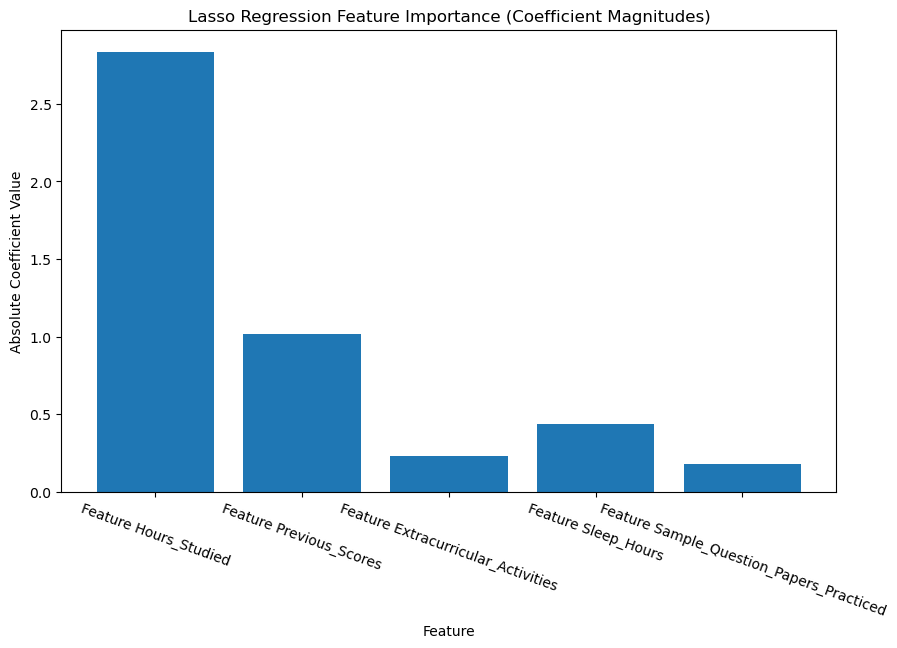

In [57]:
# 计算lasso回归特征重要性，绘制特征重要性图
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
coefficients = lasso.coef_
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), np.abs(coefficients))
plt.xticks(range(1, 6), ['Feature {}'.format(feature) for feature in features])
plt.xticks(rotation=-20)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.title('Lasso Regression Feature Importance (Coefficient Magnitudes)')
plt.show()

In [24]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.988369914984159

In [33]:
# 画岭迹图
alphas = np.logspace(-4, -0.5, 30)
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
ridge_cv.coef_

array([2.85146615, 1.01802306, 0.63120651, 0.4741721 , 0.191397  ])

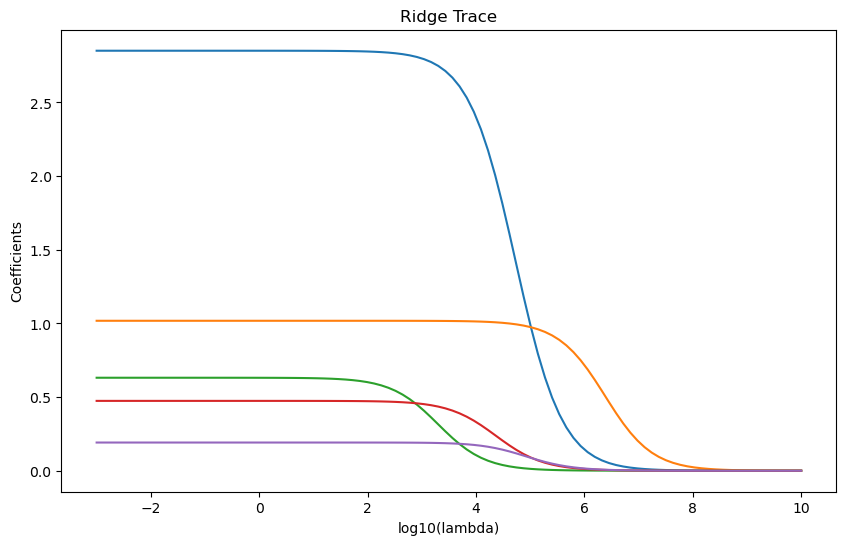

In [36]:
coefs = []
lasso_alphas = 10**np.linspace(-3, 10, 100)
for alpha in lasso_alphas:
    ridge =Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_.ravel())

plt.figure(figsize=(10, 6))
plt.plot(np.log10(lasso_alphas), coefs)
plt.xlabel('log10(lambda)')
plt.ylabel('Coefficients')
plt.title('Ridge Trace')
plt.axis('tight')
plt.show()